## Machine learning-Iris dataset
#### Developer: THIRUMURUGAN RAMAR

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = pd.read_csv("Iris.csv")

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.drop("Id", axis=1, inplace = True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### classification problem:

In [8]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.cross_validation import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

#### co-relation check:

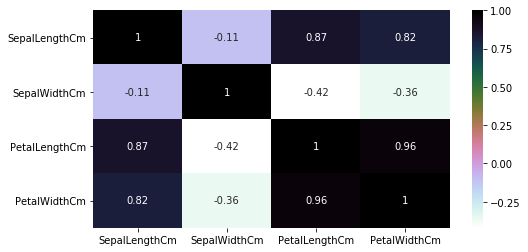

In [9]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') 
plt.show()

## observations:

1) sepal width and length are not correlated

2) petal length and sepal length are highly correlated

## TEST-TRAIN SPLIT:

In [10]:
train, test = train_test_split(iris, test_size=0.3) 
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [11]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species
train_y

101     Iris-virginica
119     Iris-virginica
13         Iris-setosa
66     Iris-versicolor
21         Iris-setosa
112     Iris-virginica
106     Iris-virginica
68     Iris-versicolor
107     Iris-virginica
103     Iris-virginica
72     Iris-versicolor
94     Iris-versicolor
14         Iris-setosa
100     Iris-virginica
129     Iris-virginica
130     Iris-virginica
11         Iris-setosa
87     Iris-versicolor
4          Iris-setosa
18         Iris-setosa
51     Iris-versicolor
148     Iris-virginica
56     Iris-versicolor
131     Iris-virginica
127     Iris-virginica
45         Iris-setosa
42         Iris-setosa
26         Iris-setosa
17         Iris-setosa
40         Iris-setosa
            ...       
69     Iris-versicolor
2          Iris-setosa
132     Iris-virginica
78     Iris-versicolor
90     Iris-versicolor
108     Iris-virginica
77     Iris-versicolor
117     Iris-virginica
81     Iris-versicolor
9          Iris-setosa
70     Iris-versicolor
83     Iris-versicolor
128     Iri

In [12]:
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species # output 

In [13]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
64,5.6,2.9,3.6,1.3
71,6.1,2.8,4.0,1.3
126,6.2,2.8,4.8,1.8
109,7.2,3.6,6.1,2.5
49,5.0,3.3,1.4,0.2


## Modelling:

### LOGISTIC REGRESSION:

In [14]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('ACCURACY: ', metrics.accuracy_score(prediction, test_y))

ACCURACY:  0.9555555555555556


### SUPPORT VECTOR MACHINES:

In [15]:
model = svm.SVC() 
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('ACCURACY:', metrics.accuracy_score(prediction, test_y))

ACCURACY: 1.0


### DECISION TREE:

In [16]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('ACCURACY:', metrics.accuracy_score(prediction, test_y))

ACCURACY: 1.0


### KNN:

In [17]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('ACCURACY', metrics.accuracy_score(prediction, test_y))

ACCURACY 1.0


## Seperating petals and sepals:

In [18]:
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

In [19]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species
test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species


train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species

### SVM:

In [20]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('ACCURACY USING PETALS:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('ACCURACY USING SEPALS:',metrics.accuracy_score(prediction,test_y_s))

ACCURACY USING PETALS: 0.9777777777777777
ACCURACY USING SEPALS: 0.8


## CONCLUSION:
As observed from the correlation table,accuracy is high in case of petals as they are highly correlated